# Guided Capstone 2 - NBA Win Model Prediction Using Machine Learning

# Section 0: Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from datetime import datetime

# Section 1: Data Import and combination

In our investigation, our attempt to recreate the prior investigators model will require data of the same time period and features. In the prior investigation, the data used produce their NBA win prediction model covered a 12 season span, between the seasons of 2008 - 2009 to 2019 - 2020. 

Kaggale offers several databases that include the data portion mentioned above, and can be wrangled to reflect the data of the prior investigation 

# Section 1 Data Wrangling

# 1.1 Data Stitching

From Kaggle, separate sets have been acquired for both individual players statistics per game, and team statistics per game. These sets are separated by season.

In [2]:
#Below code appends datasets together based on file names.
start_year = 2008
end_year = 2009

team_stats = pd.DataFrame()
player_stats = pd.DataFrame()

for i in range(12) :
    player_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    team_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    player_stats = player_stats.append(pd.read_csv(player_stats_file_path))
    team_stats = team_stats.append(pd.read_csv(team_stats_file_path))
    
    start_year = start_year + 1
    end_year = end_year + 1

In [3]:
player_stats.shape

(373069, 26)

In [4]:
player_stats.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
0,LeBron James,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,36.00,9.0,21.0,0.429,0.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,https://www.basketball-reference.com/boxscores...
1,Delonte West,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,35.29,2.0,4.0,0.500,0.0,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,https://www.basketball-reference.com/boxscores...
2,Mo Williams,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,31.18,4.0,10.0,0.400,3.0,...,3.0,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,https://www.basketball-reference.com/boxscores...
3,Zydrunas Ilgauskas,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,30.24,3.0,5.0,0.600,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,https://www.basketball-reference.com/boxscores...
4,Ben Wallace,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,19.03,1.0,1.0,1.000,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,https://www.basketball-reference.com/boxscores...


In [5]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373069 entries, 0 to 27739
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Player    373069 non-null  object 
 1   Date      373069 non-null  object 
 2   Team      373069 non-null  object 
 3   Against   373069 non-null  object 
 4   Home      373069 non-null  int64  
 5   MP        311326 non-null  float64
 6   FG        311326 non-null  float64
 7   FGA       311326 non-null  float64
 8   FG%       295932 non-null  float64
 9   3P        311326 non-null  float64
 10  3PA       311326 non-null  float64
 11  3P%       199196 non-null  float64
 12  FT        311326 non-null  float64
 13  FTA       311326 non-null  float64
 14  FT%       179762 non-null  float64
 15  ORB       311326 non-null  float64
 16  DRB       311326 non-null  float64
 17  TRB       311326 non-null  float64
 18  AST       311326 non-null  float64
 19  STL       311326 non-null  float64
 20  BLK  

In [6]:
team_stats.shape

(15348, 124)

In [7]:
team_stats.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,85.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,95.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,76.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,95.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,95.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN


In [8]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15348 entries, 0 to 1142
Columns: 124 entries, gmDate to matchWinner
dtypes: float64(110), int64(4), object(10)
memory usage: 14.6+ MB


In [9]:
team_stats.to_csv('Team_Stats.csv')

# 1.2 Cleaning player_stats

In [10]:
#Reorder columns
col = ['Player', 'Team', 'Against', 'Date']
other = [x for x in player_stats.columns if x not in col]
player_stats= player_stats[col + other]

In [11]:
#Dropping unecessary columns
player_stats.drop(columns = ['FG%', '3P%', 'FT%', 'GameLink'], inplace = True)

In [12]:
#Checking for isnull()
player_stats.isna().sum()

Player         0
Team           0
Against        0
Date           0
Home           0
MP         61743
FG         61743
FGA        61743
3P         61743
3PA        61743
FT         61743
FTA        61743
ORB        61743
DRB        61743
TRB        61743
AST        61743
STL        61743
BLK        61743
TOV        61743
PF         61743
PTS        61743
+/-        61793
dtype: int64

While evaluating the NA values, we see that we do have a good chunk of NaN data. It is clear that we are not looking at players who received 0 stats sucha as 0 pts or rebounds. Instead the data clearly records players who played zero mins have NaN's in their stats. 

In [13]:
player_stats = player_stats[player_stats['MP'].notna()]

In [14]:
player_stats.isna().sum()

Player      0
Team        0
Against     0
Date        0
Home        0
MP          0
FG          0
FGA         0
3P          0
3PA         0
FT          0
FTA         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
+/-        50
dtype: int64

In [15]:
player_stats[player_stats['+/-'].isna()].describe()

,Home,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
count,50.000000,50.000000,50.0,50.0,50.0,50.0,50.000000,50.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.000000,0.0
mean,0.520000,0.068200,0.0,0.0,0.0,0.0,0.040000,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,NaN
std,0.504672,0.122019,0.0,0.0,0.0,0.0,0.282843,0.395897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282843,NaN
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
25%,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
50%,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
75%,1.000000,0.110000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
max,1.000000,0.500000,0.0,0.0,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,NaN


In [16]:
player_stats = player_stats.dropna()

In [17]:
player_stats.isna().sum()

Player     0
Team       0
Against    0
Date       0
Home       0
MP         0
FG         0
FGA        0
3P         0
3PA        0
FT         0
FTA        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
+/-        0
dtype: int64

In [18]:
#Converting 'Date' column to datetime object
player_stats['Date'] = pd.to_datetime(player_stats['Date'])

In [19]:
player_stats[player_stats['Home'] == 1].head()

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
12,Ray Allen,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,40.39,2.0,9.0,1.0,4.0,...,1.0,3.0,4.0,1.0,1.0,0.0,4.0,1.0,8.0,-1.0
13,Paul Pierce,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,38.13,10.0,19.0,2.0,4.0,...,1.0,2.0,3.0,4.0,1.0,0.0,2.0,4.0,27.0,12.0
14,Kevin Garnett,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,36.09,5.0,15.0,0.0,0.0,...,1.0,5.0,6.0,2.0,2.0,0.0,2.0,1.0,11.0,5.0
15,Rajon Rondo,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,29.57,4.0,5.0,0.0,0.0,...,1.0,4.0,5.0,6.0,3.0,0.0,2.0,5.0,14.0,4.0
16,Kendrick Perkins,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,20.50,1.0,2.0,0.0,0.0,...,4.0,4.0,8.0,0.0,0.0,0.0,2.0,6.0,2.0,-7.0


In [20]:
player_stats['Team'].unique()

array(['Cleveland Cavaliers', 'Boston Celtics', 'Milwaukee Bucks',
       'Chicago Bulls', 'Portland Trail Blazers', 'Los Angeles Lakers',
       'Toronto Raptors', 'Philadelphia 76ers', 'New Jersey Nets',
       'Washington Wizards', 'Atlanta Hawks', 'Orlando Magic',
       'Miami Heat', 'New York Knicks', 'Phoenix Suns',
       'San Antonio Spurs', 'Oklahoma City Thunder', 'Sacramento Kings',
       'Minnesota Timberwolves', 'Indiana Pacers', 'Detroit Pistons',
       'Memphis Grizzlies', 'Houston Rockets', 'Denver Nuggets',
       'Utah Jazz', 'Los Angeles Clippers', 'New Orleans Hornets',
       'Golden State Warriors', 'Charlotte Bobc', 'Dallas Mavericks',
       'Charlotte Bobcats', 'Brooklyn Nets', 'New Orleans Pelicans',
       'Charlotte Hornets'], dtype=object)

In [21]:
player_stats.reset_index(drop = True, inplace = True)

In [22]:
#Removing non-regular season games
dates =[['2008-10-28', '2009-04-16'],['2009-10-27', '2010-04-14'], ['2010-10-26', '2011-04-13' ], ['2011-12-25', '2012-04-26'], ['2012-10-30', '2013-04-17'], ['2013-10-29', '2014-04-16'], ['2014-10-28', '2015-04-15'], ['2015-10-27', '2016-04-13'], ['2016-10-25', '2017-04-12'], ['2017-10-17', '2018-04-11'], ['2018-10-16', '2019-04-10'], ['2019-10-22', '2020-08-14' ]]
is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))
all_regsea = pd.DataFrame()

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea = pd.concat([all_regsea, player_stats.Date.apply(is_regsea)], axis=1)


2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [23]:
all_regsea = all_regsea.sum(axis=1)
regsea = np.where(all_regsea == 1)[0]
player_stats = player_stats.loc[regsea]

In [24]:
#Knowing some NBA history, there are teams that have moved cities and changed names
#we will set the GameID's to have consistency with the team and their history (per our duration of interest)
#NJN moved to Brooklyn and known now as the BKN
#New Orleans Hornets are now the New Orlean Pelicans
#Charlotte Bobcats are the Charlotte Hornets 
name_change = player_stats[['Team', 'Against', 'Home']]

name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
name_change['Against'] = name_change['Against'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })


<ipython-input-24-ce389f236851>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
<ipython-input-24-ce389f236851>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Against'] = n

In [25]:
#Pulling the home team's name abbreviation.
name_change['abbr'] = np.where(name_change['Home']==1, name_change['Team'].str[0:3].str.upper(), name_change['Against'].str[0:3].str.upper())

<ipython-input-25-9081e4525c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['abbr'] = np.where(name_change['Home']==1, name_change['Team'].str[0:3].str.upper(), name_change['Against'].str[0:3].str.upper())


In [26]:
#Abbreviations work for some team names, but not all team names use the abbreviation of the first name. 
name_change['abbr'] = name_change['abbr'].replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})

<ipython-input-26-44db675c6e44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['abbr'] = name_change['abbr'].replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})


In [27]:
player_stats['gameID'] =  player_stats['Date'].dt.strftime('%Y%m%d') + name_change['abbr']
player_stats.drop(columns = 'Home', inplace=True)
player_stats.head()

,Player,Team,Against,Date,MP,FG,FGA,3P,3PA,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,gameID
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,36.00,9.0,21.0,0.0,4.0,4.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,20081028BOS
1,Delonte West,Cleveland Cavaliers,Boston Celtics,2008-10-28,35.29,2.0,4.0,0.0,1.0,2.0,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,20081028BOS
2,Mo Williams,Cleveland Cavaliers,Boston Celtics,2008-10-28,31.18,4.0,10.0,3.0,5.0,1.0,...,3.0,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,20081028BOS
3,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,30.24,3.0,5.0,0.0,0.0,9.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,20081028BOS
4,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,19.03,1.0,1.0,0.0,0.0,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,20081028BOS


In [28]:
player_stats.sort_values(by = 'Date', ascending = False, inplace = True)
player_stats.reset_index(inplace = True, drop = True)

In [29]:
player_stats.shape
#Compared to the initial shape (373069, 27)

(290968, 22)

In [30]:
clean_player_stats = player_stats

In [31]:
clean_player_stats.head()

,Player,Team,Against,Date,MP,FG,FGA,3P,3PA,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,gameID
0,Ben McLemore,Houston Rockets,Philadelphia 76ers,2020-08-14,11.21,1.0,4.0,1.0,3.0,0.0,...,2.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,-17.0,20200814HOU
1,Chris Silva,Miami Heat,Indiana Pacers,2020-08-14,24.29,2.0,4.0,0.0,0.0,1.0,...,7.0,11.0,1.0,0.0,3.0,1.0,3.0,5.0,-12.0,20200814IND
2,Dewan Hernandez,Toronto Raptors,Denver Nuggets,2020-08-14,12.42,2.0,6.0,0.0,0.0,0.0,...,4.0,7.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,20200814TOR
3,Kendrick Nunn,Miami Heat,Indiana Pacers,2020-08-14,32.58,8.0,27.0,1.0,9.0,6.0,...,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,20200814IND
4,Tyler Herro,Miami Heat,Indiana Pacers,2020-08-14,27.56,6.0,16.0,3.0,8.0,1.0,...,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,20200814IND


# 1.3 Saving Cleaned Player Stats Data To CSV

In [32]:
clean_player_stats.to_csv('Cleaned_Player_Stats.csv')

# 1.3 Cleaning team_stats

In [33]:
#read in team_stats
team_stats = pd.read_csv('Team_Stats.csv')

In [34]:
team_stats.reset_index(drop=True)

,Unnamed: 0,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15343,1138,2020-09-24,Playoffs,2019-20,3,1,LAL,Away,Win,1.0,...,120.4,127.1,-6.7,0.48,22.03,2.00,0.36,89.7,89.7,LAL
15344,1139,2020-09-25,Playoffs,2019-20,3,2,MIA,Away,Loss,1.0,...,119.6,106.7,12.9,0.46,24.12,2.64,0.64,101.2,101.2,BOS
15345,1140,2020-09-26,Playoffs,2019-20,1,4,DEN,Away,Loss,1.0,...,119.1,108.9,10.2,0.49,23.71,1.85,0.46,98.2,98.2,LAL
15346,1141,2020-09-27,Playoffs,2019-20,2,4,BOS,Away,Loss,1.0,...,125.2,113.2,12.0,0.50,27.13,2.50,0.50,99.9,99.9,MIA


In [35]:
#Converting 'gmDate' column to datetime object

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])

In [36]:
team_stats= team_stats.iloc[:,1:]
team_stats.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,85.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,95.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,76.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,95.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,95.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN


In [37]:
#We will separate the data into regular season and playoffs.
team_stats = team_stats[team_stats['seasonType']=='Regular']

In [38]:
#The games stats are recorded as team vs. opponent with another column indicating whether this is a home game or an away game. 
#This format leaves me to suspect there is double data of the same game. Let's investigate. 

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats[['teamAbbr', 'teamLoc', 'opptAbbr', 'opptLoc', 'gmDate', 'opptLoc']][team_stats['gmDate'] == datetime(2019,3,22)]

#Seems our suspicion was wrong and away_games=team as home_games=opp. We will keep this in mind during feature engineering.
#Double check and seems Allstar games are not included as well. 

,teamAbbr,teamLoc,opptAbbr,opptLoc,gmDate,opptLoc
13972,MEM,Away,ORL,Home,2019-03-22,Home
13973,LAC,Away,CLE,Home,2019-03-22,Home
13974,DEN,Away,NYK,Home,2019-03-22,Home
13975,OKC,Away,TOR,Home,2019-03-22,Home
13976,SAS,Away,HOU,Home,2019-03-22,Home
13977,MIA,Away,MIL,Home,2019-03-22,Home
13978,BRK,Away,LAL,Home,2019-03-22,Home


In [39]:
team_stats.reset_index(inplace = True, drop = True)

In [40]:
all_regsea2 = pd.DataFrame()
is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea2 = pd.concat([all_regsea2, team_stats.gmDate.apply(is_regsea)], axis=1)

2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [41]:
all_regsea2 = all_regsea2.sum(axis=1)
regsea2 = np.where(all_regsea2 == 1)[0]
team_stats = team_stats.loc[regsea2]

In [42]:
team_stats.reset_index(inplace = True, drop = True)

In [43]:
#The games stats are recorded as team vs. opponent with another column indicating whether this is a home game or an away game. 
#This format leaves me to suspect there is double data of the same game. Let's investigate. 

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats[['teamAbbr', 'teamLoc', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2019,3,22)]

#Seems our suspicion was wrong and away_games=team as home_games=opp. We will keep this in mind during feature engineering. 

,teamAbbr,teamLoc,opptAbbr,opptLoc
13138,MEM,Away,ORL,Home
13139,LAC,Away,CLE,Home
13140,DEN,Away,NYK,Home
13141,OKC,Away,TOR,Home
13142,SAS,Away,HOU,Home
13143,MIA,Away,MIL,Home
13144,BRK,Away,LAL,Home


In [44]:
len(team_stats['opptAbbr'].unique())

33

In [45]:
#33 teams, 3 more than what we had with the player stats, that means we have 3 team abbreviations that are duplicates
#CHA were the charlotte bobcats that because the new charlotto hornets CHO 
#NJN became the BKN
#NOH changed name to NOP
team_name_change = team_stats['opptAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})

In [46]:
len(team_name_change.unique())

30

In [47]:
dateString =  team_stats['gmDate'].dt.strftime('%Y%m%d')

In [48]:
dateString[dateString.eq('20190322')]

13138    20190322
13139    20190322
13140    20190322
13141    20190322
13142    20190322
13143    20190322
13144    20190322
Name: gmDate, dtype: object

In [49]:
# Creating game id for each game, as the nomenclature are the same, we should expect the same ID's as the players stats
team_stats['GameID'] = dateString + team_name_change

In [50]:
team_stats[['GameID','teamAbbr', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2008,10,28)]

,GameID,teamAbbr,opptAbbr,opptLoc
0,20081028BOS,CLE,BOS,Home
1,20081028CHI,MIL,CHI,Home
2,20081028LAL,POR,LAL,Home


In [51]:
#Renaming Columns

team_stats.rename(columns = {'gmDate' : 'Date', 'teamAbbr' : 'A_Team', 'opptAbbr' : 'H_Team' ,'teamFGM': 'teamFGMade', 'team2PM' : 'team2PMade' , 'team3PM' : 'team3PMade', 'teamFTM' : 'teamFTMade',   'opptFGM': 'opptFGMade', 'oppt2PM': 'oppt2PMade', 'oppt3PM' : 'oppt3PMade', 'opptFTM' : 'opptFTMade'}, inplace = True)

In [52]:
#Removing percentage columns. 

team_stats.drop(columns = ['seasonType', 'teamFG%', 'team2P%', 'team3P%', 'teamFT%', 'teamTREB%', 'teamASST%', 'teamTS%', 'teamEFG%', 'teamOREB%', 'teamLoc', 'teamDREB%', 'teamTO%', 'teamSTL%', 'teamBLK%', 'teamBLKR', 'teamPPS', 'teamFIC', 'teamFIC40' , 'teamPlay%', 'teamAR', 'teamPoss', 'teamPace', 'teamSTL/TO', 'teamEDiff', 'opptEDiff', 'teamAST/TO', 'opptAST/TO', 'opptFG%', 'oppt2P%', 'oppt3P%', 'opptFT%', 'opptTREB%', 'opptASST%', 'opptTS%', 'opptEFG%', 'opptLoc', 'opptOREB%', 'opptDREB%', 'opptTO%', 'opptSTL%', 'opptBLK%', 'opptBLKR', 'opptPPS', 'opptFIC', 'opptFIC40', 'opptPlay%', 'opptAR', 'opptSTL/TO', 'opptPoss', 'opptPace'], inplace = True)

In [53]:
team_stats['H_Loc'] = team_stats['H_Team']

In [54]:
#Creating Missed Columns for shooting statistics

team_stats['teamFGMissed'] = team_stats['teamFGA'] - team_stats['teamFGMade']
team_stats['team2PMissed'] = team_stats['team2PA'] - team_stats['team2PMade'] 
team_stats['team3PMissed'] = team_stats['team3PA'] - team_stats['team3PMade']
team_stats['opptFGMissed'] = team_stats['opptFGA'] - team_stats['opptFGMade']
team_stats['oppt2PMissed'] = team_stats['oppt2PA'] - team_stats['oppt2PMade']
team_stats['oppt3PMissed'] = team_stats['oppt3PA'] - team_stats['oppt3PMade']

In [55]:
team_stats.sort_values(by = 'Date', ascending = False, inplace=True)
team_stats.reset_index(inplace = True, drop = True)

In [56]:
team_stats.columns = [col.replace('team', 'A_') for col in team_stats.columns]
team_stats.columns = [col.replace('oppt', 'H_') for col in team_stats.columns]

In [57]:
team_stats.columns

Index(['Date', 'season', 'A_Wins', 'A_Losses', 'A_Team', 'A_Rslt', 'A_DayOff',
       'A_PTS', 'A_AST', 'A_TO', 'A_Min', 'A_STL', 'A_BLK', 'A_PF', 'A_FGA',
       'A_FGMade', 'A_2PA', 'A_2PMade', 'A_3PA', 'A_3PMade', 'A_FTA',
       'A_FTMade', 'A_ORB', 'A_DRB', 'A_TRB', 'A_PTS1', 'A_PTS2', 'A_PTS3',
       'A_PTS4', 'A_PTS5', 'A_PTS6', 'A_PTS7', 'A_PTS8', 'A_PTS9', 'A_PTS10',
       'A_Ortg', 'A_Drtg', 'H_Wins', 'H_Losses', 'H_Team', 'H_Rslt',
       'H_DayOff', 'H_PTS', 'H_AST', 'H_TO', 'H_Min', 'H_STL', 'H_BLK', 'H_PF',
       'H_FGA', 'H_FGMade', 'H_2PA', 'H_2PMade', 'H_3PA', 'H_3PMade', 'H_FTA',
       'H_FTMade', 'H_ORB', 'H_DRB', 'H_TRB', 'H_PTS1', 'H_PTS2', 'H_PTS3',
       'H_PTS4', 'H_PTS5', 'H_PTS6', 'H_PTS7', 'H_PTS8', 'H_PTS9', 'H_PTS10',
       'H_Ortg', 'H_Drtg', 'matchWinner', 'GameID', 'H_Loc', 'A_FGMissed',
       'A_2PMissed', 'A_3PMissed', 'H_FGMissed', 'H_2PMissed', 'H_3PMissed'],
      dtype='object')

In [58]:
#Reorder the columns for easier visuals

def alternate_lists(l_1, l_2) :
    l = []
    for i in range(len(l_1)) :
        l.append(l_1[i])
        l.append(l_2[i])
    return l

new_column_order = []
l = ['Date', 'GameID', 'season', 'H_Team', 'H_Wins', 'H_Losses', 'A_Team','A_Wins', 'A_Losses', 'H_Loc']

other = [x for x in team_stats.columns if x not in l] 

for i in range (1, 10) :
    h_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'H_' in x]
    a_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'A_' in x]
    
    overall_stats = alternate_lists(h_stats_for_given_quarter, a_stats_for_given_quarter)
    new_column_order += overall_stats

h_full_game_stats = [x for x in other if x not in new_column_order and 'H_' in x]
a_full_game_stats = [x for x in other if x not in new_column_order and 'A_' in x]
overall_full_game_stats = alternate_lists(h_full_game_stats, a_full_game_stats)

new_column_order = l + overall_full_game_stats + new_column_order

cleaned_team_stats= team_stats[new_column_order]

In [59]:
cleaned_team_stats

,Date,GameID,season,H_Team,H_Wins,H_Losses,A_Team,A_Wins,A_Losses,H_Loc,...,H_PTS5,A_PTS5,H_PTS6,A_PTS6,H_PTS7,A_PTS7,H_PTS8,A_PTS8,H_PTS9,A_PTS9
0,2020-08-14,20200814HOU,2019-20,HOU,44,28,PHI,43,30,HOU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-14,20200814LAC,2019-20,LAC,49,23,OKC,44,28,LAC,...,20.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-14,20200814IND,2019-20,IND,45,28,MIA,44,29,IND,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-08-14,20200814TOR,2019-20,TOR,53,19,DEN,46,27,TOR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-08-13,20200813BKN,2019-20,BRK,35,37,POR,35,39,BRK,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14343,2008-10-29,20081029WAS,2008-09,WAS,0,1,NJN,1,0,WAS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14344,2008-10-29,20081029PHI,2008-09,PHI,0,1,TOR,1,0,PHI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14345,2008-10-28,20081028LAL,2008-09,LAL,1,0,POR,0,1,LAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14346,2008-10-28,20081028CHI,2008-09,CHI,1,0,MIL,0,1,CHI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
cleaned_team_stats.to_csv('cleaned_team_stats.csv')

# Section 2 Feature Engineering

Our main goal is to predict winning and losing of games between teams. The stats teams and players accrue in games are not as helpful, therefore, we will engineer a few features that will provide more insight into win/loss predictions. The prior investigation utilized the following. 

1. Elo Ratings 
The Elo system is a calculate stat that keeps track of relative skill and quality of teams within the league. Everyteam starts with the same Elo rating at the beggining of a season, and will either add to or subtract value as they win/lose throughoput the season. 

2. Recent Team Performances 
We will keep track of the rolling averages for a teams performance over the last 10 games prior to the game we are predicting. This gives us a glimps of how the team is playing recently leading up to the predicted game. 

3. Recent Player Performances 
Keeping track of player performances can also tell us how well that player will play (suspicious of paisson model behaviour for players and their scoring in view of their seasonal stats) 

4. Player Performance In Season
Likewise, how this player has performed up to their current game within the season can also gives us glimpse into how their performances are trending. 

# 2.1 Elo Ratings

## Read in Team stats

In [61]:
team_stats = pd.read_csv('cleaned_team_stats.csv')
team_stats['Date'] = pd.to_datetime(team_stats['Date'])
team_stats.drop(columns = team_stats.columns[0], axis=1, inplace = True)
team_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14348 entries, 0 to 14347
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        14348 non-null  datetime64[ns]
 1   GameID      14348 non-null  object        
 2   season      14348 non-null  object        
 3   H_Team      14348 non-null  object        
 4   H_Wins      14348 non-null  int64         
 5   H_Losses    14348 non-null  int64         
 6   A_Team      14348 non-null  object        
 7   A_Wins      14348 non-null  int64         
 8   A_Losses    14348 non-null  int64         
 9   H_Loc       14348 non-null  object        
 10  H_Rslt      14348 non-null  object        
 11  A_Rslt      14348 non-null  object        
 12  H_DayOff    14348 non-null  float64       
 13  A_DayOff    14348 non-null  float64       
 14  H_PTS       14348 non-null  float64       
 15  A_PTS       14348 non-null  float64       
 16  H_AST       14348 non-

Elo rating takes into account variables suc as difficult of schedule, home court advantage, margin of victory, and etc. These variables give more insight than simply utilizing team win record percentages. The formula below was concepted by [Nate Silver](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/#:~:text=Here's%20the%20formula%3A%20Take%20the,and%20then%20divide%20by%2028.). 

All teams start off with a 1500 elo rating. After each game, the winner is award addition elo value and the loser has their elo value subtracted. The equation to calculate for Elo is shown below, where $R_{i}$ is the current Elo rating.

$$ R_{i + 1} = k * (S_{team} - E_{team} + R_{i}) $$


$S_{team} = 1 $ when the team wins, and 0 if the team loses. The $E_{team}$ value is expected win probability of the team which is further defined as 

$$ E_{team} = \frac{1}{1+10^{\frac{opp\_elo - team\_elo}{400}}}$$

The $k$ in the the Elo equationis a moving constant depending on the margin of victory and difference in Elo ratings. The k constant is calculated as: 

$$ k = 20 \frac{(MOV_{winner} + 3)^{0.8}}{7.5 + 0.006(elo\_difference_{winner})} $$

Elo ratings carry over from season to season, as teams who were good previous season, usually do not have significant drop offs from previous seasons. If $R$ is a teams final Elo rating for a season, than below is the Elo rating to being their next season. 

$$ (R * 0.75) + (0.25 * 0501)$$

## Def Elo Variable Functions

Function for win probabilty as per Nate Silver [Win Prob](https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/)

$$ Pr(Home) = \frac{1}{10^{(-EloDiff/400)}+1}$$

In [62]:
#Define function to calculate Win Probability implied by Elo ratings and home court adjustments
def win_probs(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom
    
    return home_prob, away_prob

#odds the home team will win based on elo ratings and home court advantage

def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    return a*h/r

#this function determines the constant used in the elo rating, based on margin of victory and difference in elo ratings
def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier

#updates the home and away teams elo ratings after a game 

def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage) 
    
    if (home_score - away_score > 0) :
        
        home_win = 1 
        away_win = 0 
    
    else :
        
        home_win = 0 
        away_win = 1 
        
    k = elo_k(home_score - away_score, home_elo - away_elo)
    
    updated_home_elo = home_elo + k * (home_win - home_prob) 
    updated_away_elo = away_elo + k * (away_win - away_prob)
    
    return updated_home_elo, updated_away_elo


#takes into account prev season elo
def get_prev_elo(team, date, season, team_stats, elo_df) :
    prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0] 
    
    if team == prev_game['H_Team'] :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['H_Team_Elo_After'].values[0]
        
    else :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['A_Team_Elo_After'].values[0]
        
    if prev_game['season'] != season :
        return (0.75 * elo_rating) + (0.25 * 1505)
    
    else :
        return elo_rating


## Calculating Elo Ratings

In [63]:
team_stats.sort_values(by = 'Date', inplace = True)
team_stats.reset_index(inplace=True, drop = True)

elo_df = pd.DataFrame(columns=['GameID', 'H_Team', 'A_Team', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df = pd.DataFrame(columns=['GameID','Team', 'Elo', 'Date', 'Where_Played', 'season']) 

for index, row in team_stats.iterrows(): 
    game_id = row['GameID']
    game_date = row['Date']
    season = row['season']
    h_team, a_team = row['H_Team'], row['A_Team']
    h_score, a_score = row['H_PTS'], row['A_PTS'] 
    
    if (h_team not in elo_df['H_Team'].values and h_team not in elo_df['A_Team'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, team_stats, elo_df)
    
    if (a_team not in elo_df['H_Team'].values and a_team not in elo_df['A_Team'].values) : 
        a_team_elo_before = 1500
    
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, team_stats, elo_df)
    
    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)
    
    new_row = {'GameID': game_id, 'H_Team': h_team, 'A_Team': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'GameID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'season': season}
    teams_row_two = {'GameID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'season': season}

    elo_df = elo_df.append(new_row, ignore_index = True)
    teams_elo_df = teams_elo_df.append(teams_row_one, ignore_index=True)
    teams_elo_df = teams_elo_df.append(teams_row_two, ignore_index=True)
    
    
    

<ipython-input-62-427c6ce96732>:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0]


In [64]:
#teams_elo_df.set_index(["Team"], append=True)
#dataset = teams_elo_df.pivot(index="Team",values="Elo", columns="Date")
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df["Date"]]))
dates = sorted(dates, key=lambda x: datetime.strptime(x, '%m-%d-%Y'))
teams = team_stats["A_Team"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")
for index, row in teams_elo_df.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo

teams_elo_df['Elo'] = teams_elo_df['Elo'].astype(float)

elo_df

,GameID,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,20081028BOS,BOS,CLE,1500,1500,1505.657856,1494.342144
1,20081028CHI,CHI,MIL,1500,1500,1509.850900,1490.149100
2,20081028LAL,LAL,POR,1500,1500,1513.169285,1486.830715
3,20081029PHI,PHI,TOR,1500,1500,1486.830104,1513.169896
4,20081029WAS,WAS,NJN,1500,1500,1487.588205,1512.411795
...,...,...,...,...,...,...,...
14343,20200813BKN,BRK,POR,1519.375796,1528.949684,1514.685138,1533.640341
14344,20200814TOR,TOR,DEN,1683.717476,1549.140211,1687.594811,1545.262876
14345,20200814IND,IND,MIA,1563.843324,1566.975687,1575.776597,1555.042414
14346,20200814LAC,LAC,OKC,1643.173936,1587.447249,1647.143683,1583.477502


In [65]:
teams_elo_df['Where_Played'].unique()

array(['Home', 'Away'], dtype=object)

Reviewing the data in a visual medium

Text(0.5, 1.0, 'ELO over Time')

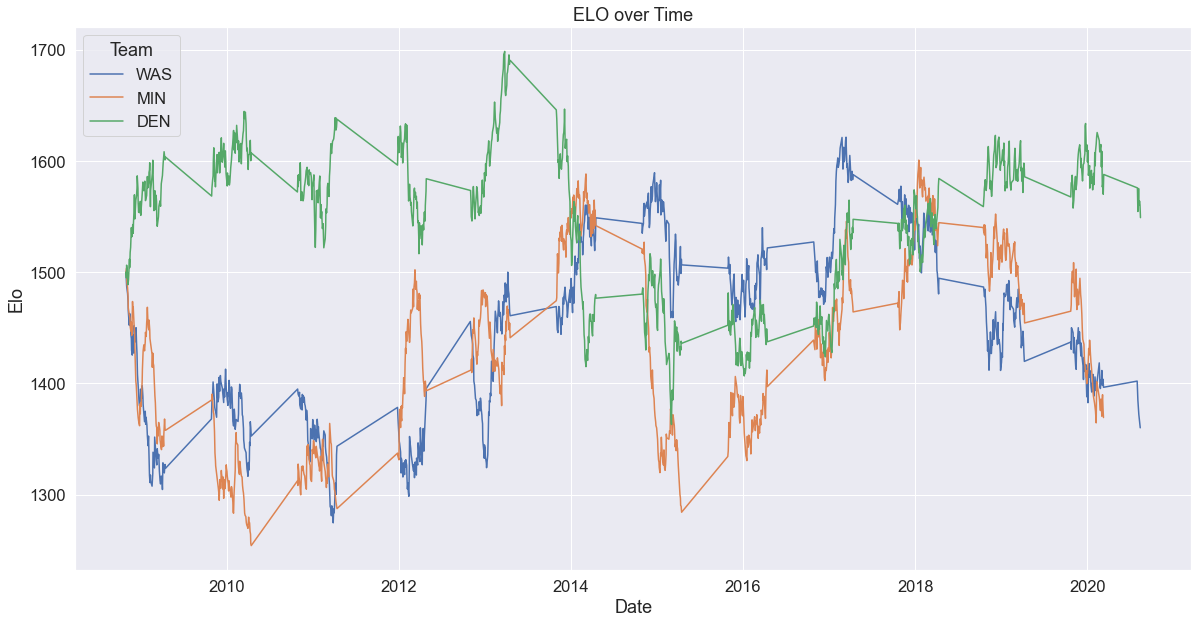

In [66]:
%matplotlib inline
import random

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
'''
for index, row in dataset.sample(frac=0.2).iterrows():
  sns.lineplot(data=row, x=dates, y=row.values)

plt.set(xlabel="Dates")
'''
elos = teams_elo_df['Elo'].values
#teams_elo_df['Elo_moving_average'] = runningMeanFast(elos, 15)
plt.figure(figsize=(20,10))
sample_teams = random.sample(list(teams), k=3)
sns.set(font_scale=1.5)
sampled_data = teams_elo_df.loc[teams_elo_df['Team'].isin(sample_teams)]
sns.lineplot(data=sampled_data, x='Date', y='Elo', hue='Team')
plt.title("ELO over Time")

## 2.2 Recent Team Performance 

### Teams avg stats in previous ten games

In [67]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14348 entries, 0 to 14347
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        14348 non-null  datetime64[ns]
 1   GameID      14348 non-null  object        
 2   season      14348 non-null  object        
 3   H_Team      14348 non-null  object        
 4   H_Wins      14348 non-null  int64         
 5   H_Losses    14348 non-null  int64         
 6   A_Team      14348 non-null  object        
 7   A_Wins      14348 non-null  int64         
 8   A_Losses    14348 non-null  int64         
 9   H_Loc       14348 non-null  object        
 10  H_Rslt      14348 non-null  object        
 11  A_Rslt      14348 non-null  object        
 12  H_DayOff    14348 non-null  float64       
 13  A_DayOff    14348 non-null  float64       
 14  H_PTS       14348 non-null  float64       
 15  A_PTS       14348 non-null  float64       
 16  H_AST       14348 non-

In [68]:
def get_avg_stats(team, game_date, team_season_stats, n) :
    prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)
    
    home_df = prior_games.iloc[:, range(3, 53 ,2)]
    home_df.columns = [x[2:] for x in home_df.columns]
    away_df = prior_games.iloc[:, range( 4, 54, 2)]
    away_df.columns = [x[2:] for x in away_df.columns ]
    
    df = pd.concat([home_df, away_df])
    df = df[df['Team']==team]
    df.drop(columns = ['Team'], inplace = True)
    
    return df.mean()

In [69]:
#Recent Performance dataframe for team stats
rp_df = pd.DataFrame()


for Season in team_stats['season'].unique():
    c1 = ['Date', 'GameID', 'season', 'H_Team', 'A_Team']
    c2 = list(team_stats.columns[14:65])
    columns = c1 + c2
    
    team_season_stats = team_stats[cleaned_team_stats['season'] == Season ].sort_values(by='Date')[columns].reset_index(drop = True)
    
    season_recent_performance = pd. DataFrame()
    
    for index, row in team_season_stats.iterrows():
        game_ID = row['GameID']
        game_date = row['Date']
        h_team = row['H_Team']
        a_team = row['A_Team']
        
        h_team_recent_performance = get_avg_stats(h_team, game_date, team_season_stats, 10)
        h_team_recent_performance.index = ['H_Last_10_gm_avg_' + x for x in h_team_recent_performance.index]
        
        a_team_recent_performance = get_avg_stats(a_team, game_date, team_season_stats, 10)
        a_team_recent_performance.index = ['A_Last_10_gm_avg_' + x for x in a_team_recent_performance.index]
        
        nrow = pd.concat([h_team_recent_performance, a_team_recent_performance], sort = False)
        nrow['GameID'] = game_ID
        
        season_recent_performance = season_recent_performance.append(nrow, ignore_index = True)
        season_recent_performance = season_recent_performance[nrow.index]
    
    rp_df = pd.concat([rp_df, season_recent_performance])
    
    



<ipython-input-68-b6402a73a58b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)


In [70]:
rp_df.dropna()

,H_Last_10_gm_avg_PTS,H_Last_10_gm_avg_AST,H_Last_10_gm_avg_TO,H_Last_10_gm_avg_Min,H_Last_10_gm_avg_STL,H_Last_10_gm_avg_BLK,H_Last_10_gm_avg_PF,H_Last_10_gm_avg_FGA,H_Last_10_gm_avg_FGMade,H_Last_10_gm_avg_2PA,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,GameID
14,117.0,39.0,13.0,240.0,6.0,7.0,25.0,91.0,44.0,49.0,...,11.0,35.0,46.0,0.0,107.20,113.10,42.0,28.0,14.0,20190321GSW
16,121.0,25.0,20.0,240.0,13.0,1.0,19.0,95.0,49.0,70.0,...,6.0,29.0,35.0,0.0,116.90,124.80,44.0,24.0,20.0,20190321SAC
18,114.0,16.0,9.0,240.0,3.0,2.0,22.0,83.0,36.0,48.0,...,13.0,39.0,52.0,0.0,106.30,116.20,53.0,26.0,27.0,20190321CHO
19,105.0,30.0,19.0,240.0,6.0,1.0,23.0,84.0,39.0,44.0,...,7.0,33.0,40.0,0.0,138.60,117.30,37.0,15.0,22.0,20190321ATL
20,123.0,30.0,17.0,265.0,11.0,5.0,27.0,87.0,45.0,51.0,...,16.0,32.0,48.0,0.0,103.50,111.60,60.0,30.0,30.0,20190322TOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,104.4,25.7,14.2,247.5,9.0,3.9,23.4,85.9,39.9,73.7,...,9.6,33.0,42.6,0.0,107.61,102.02,41.3,29.5,11.8,20090324UTA
1055,107.1,19.1,14.4,245.0,6.5,5.2,19.4,83.9,38.9,67.7,...,15.4,29.9,45.3,0.0,111.94,110.02,47.5,40.8,6.7,20090324CHI
1056,92.5,17.3,15.8,240.0,9.5,4.4,19.9,80.8,35.6,68.3,...,12.1,30.4,42.5,0.0,112.55,108.24,44.0,32.6,11.4,20090324OKC
1057,91.9,19.7,10.8,240.0,6.1,3.8,18.2,79.0,36.1,61.8,...,11.4,32.8,44.2,0.0,109.55,115.57,46.5,34.8,11.7,20090324SAS


In [71]:
'20081030PHO' in list(rp_df['GameID'])

True

## 2.3 Combing average stats 

### Create a final_team_stats which combines data from the recent performance dataframe with the meta data of each game. 

In [72]:
final_team_stats = team_stats.iloc[0 :, [0,1,2,3,6,14,15]].merge(elo_df.drop(columns=['H_Team', 'A_Team']), on = 'GameID') \
.merge(rp_df, on = 'GameID')

In [73]:
final_team_stats = final_team_stats.dropna()

In [74]:
final_team_stats

,Date,GameID,season,H_Team,A_Team,H_PTS,A_PTS,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,...,A_Last_10_gm_avg_FTMade,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed
16,2008-10-30,20081030PHO,2008-09,PHO,NOH,95.0,108.0,1508.416895,1508.416895,1493.762230,...,19.0,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0
18,2008-10-31,20081031PHI,2008-09,PHI,NYK,116.0,87.0,1486.830104,1505.657856,1505.383439,...,27.0,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0
19,2008-10-31,20081031TOR,2008-09,TOR,GSW,112.0,108.0,1513.169896,1491.583105,1517.801701,...,22.0,11.0,28.0,39.0,0.0,107.40,112.60,46.0,32.0,14.0
20,2008-10-31,20081031MIA,2008-09,MIA,SAC,103.0,77.0,1494.342144,1496.115314,1510.314181,...,19.0,9.0,36.0,45.0,0.0,101.40,103.50,44.0,32.0,12.0
21,2008-10-31,20081031BOS,2008-09,BOS,CHI,96.0,80.0,1505.657856,1509.8509,1517.162690,...,33.0,14.0,26.0,40.0,0.0,120.30,105.80,34.0,27.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14343,2020-08-13,20200813BKN,2019-20,BRK,POR,133.0,134.0,1519.375796,1528.949684,1514.685138,...,19.5,10.2,33.4,43.6,0.0,121.65,120.32,47.3,25.9,21.4
14344,2020-08-14,20200814TOR,2019-20,TOR,DEN,117.0,109.0,1683.717476,1549.140211,1687.594811,...,15.2,9.6,32.8,42.4,0.0,115.95,119.68,44.8,23.8,21.0
14345,2020-08-14,20200814IND,2019-20,IND,MIA,109.0,92.0,1563.843324,1566.975687,1575.776597,...,19.9,7.8,34.5,42.3,0.0,111.90,110.31,44.2,19.4,24.8
14346,2020-08-14,20200814LAC,2019-20,LAC,OKC,107.0,103.0,1643.173936,1587.447249,1647.143683,...,19.9,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7


In [75]:
#Setting dataframes to combine into a final team performance df 
h_cols = final_team_stats.columns[final_team_stats.columns.str.startswith('H_')]

team_df = final_team_stats.iloc[0:, [0,1,2,3,4,9,10]].drop(columns = ['H_Team', 'A_Team'])
team_df_h = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('A_')])
team_df_a = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('H_')])

recent_perf_h = rp_df.drop(columns = rp_df.columns\
                           [rp_df.columns.str.startswith('A_')])
recent_perf_a = rp_df.drop(columns = rp_df.columns\
                           [rp_df.columns.str.startswith('H_')])

#Combining team_df, teams_elo_df, and recent_perf to create a team by team df. 
tbt_h = team_df_h.merge(teams_elo_df[teams_elo_df.Where_Played == 'Home'], on = 'GameID') \
.merge(recent_perf_h, on ='GameID')

tbt_a = team_df_a.merge(teams_elo_df[teams_elo_df.Where_Played == 'Away'], on = 'GameID') \
.merge(recent_perf_a, on ='GameID')

#Removing 'H_' and 'A_', redundant information in our new df. _x, and _y will appear after first operator and will need to be removed

tbt_h.columns = tbt_h.columns.str.replace('H_', '')
tbt_h.columns = tbt_h.columns.str.replace('_x', '')
tbt_h.columns = tbt_h.columns.str.replace('_y', '')
tbt_a.columns = tbt_a.columns.str.replace('A_', '')
tbt_a.columns = tbt_a.columns.str.replace('_x', '')
tbt_a.columns = tbt_a.columns.str.replace('_y', '')
#Removing any duplicate columns 
tbt_h = tbt_h.loc[:, ~tbt_h.columns.duplicated()]
tbt_a = tbt_a.loc[:, ~tbt_a.columns.duplicated()]

#concating the away and home team by team dataframes by index
final_team_performances_df = pd.concat([tbt_h, tbt_a]).sort_index(axis=0).reset_index().drop(columns=['index'])

In [76]:
final_team_performances_df

,Date,GameID,season,Team_Elo_After,Team,Elo,Where_Played,Last_10_gm_avg_PTS,Last_10_gm_avg_AST,Last_10_gm_avg_TO,...,Last_10_gm_avg_FTMade,Last_10_gm_avg_ORB,Last_10_gm_avg_DRB,Last_10_gm_avg_TRB,Last_10_gm_avg_PTS10,Last_10_gm_avg_Ortg,Last_10_gm_avg_Drtg,Last_10_gm_avg_FGMissed,Last_10_gm_avg_2PMissed,Last_10_gm_avg_3PMissed
0,2008-10-30,20081030PHO,2008-09,1493.762230,PHO,1508.416895,Home,103.0,24.0,10.0,...,19.0,9.0,30.0,39.0,0.0,116.60,110.90,40.0,31.0,9.0
1,2008-10-30,20081030PHO,2008-09,1523.071560,NOH,1508.416895,Away,108.0,23.0,13.0,...,19.0,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0
2,2008-10-31,20081031PHI,2008-09,1505.383439,PHI,1486.830104,Home,84.0,15.0,17.0,...,21.0,23.0,33.0,56.0,0.0,99.80,112.80,55.0,40.0,15.0
3,2008-10-31,20081031PHI,2008-09,1487.104521,NYK,1505.657856,Away,120.0,27.0,15.0,...,27.0,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0
4,2008-10-31,20081031TOR,2008-09,1517.801701,TOR,1513.169896,Home,95.0,24.0,9.0,...,13.0,10.0,23.0,33.0,0.0,112.80,99.80,45.0,39.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,2020-08-14,20200814IND,2019-20,1575.776597,IND,1563.843324,Home,110.4,24.0,13.6,...,15.5,7.7,34.9,42.6,0.0,109.28,108.60,45.8,27.3,18.5
28268,2020-08-14,20200814LAC,2019-20,1583.477502,OKC,1587.447249,Away,110.3,21.1,14.0,...,19.9,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7
28269,2020-08-14,20200814LAC,2019-20,1647.143683,LAC,1643.173936,Home,118.8,22.1,11.6,...,21.7,8.9,36.5,45.4,0.0,120.43,112.98,45.0,23.0,22.0
28270,2020-08-14,20200814HOU,2019-20,1535.391950,HOU,1570.072227,Home,114.8,22.4,15.4,...,21.3,6.9,33.0,39.9,0.0,108.75,110.06,48.9,16.0,32.9


## 2.4 Label column and save df to csv

Creating a final "Label" that differentiates between winner and loser for our evaluation. 

In [77]:
final_team_stats['Label'] = [1 if x > 0 else 0 for x in final_team_stats['H_PTS'] - final_team_stats['A_PTS']]

final_team_stats.drop(columns = ['H_PTS', 'A_PTS'], inplace = True)
final_team_stats = final_team_stats.dropna()
final_team_stats.reset_index(drop= True, inplace = True)

combined_df = final_team_stats
final_team_stats

,Date,GameID,season,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After,H_Last_10_gm_avg_PTS,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,Label
0,2008-10-30,20081030PHO,2008-09,PHO,NOH,1508.416895,1508.416895,1493.762230,1523.071560,103.0,...,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0,0
1,2008-10-31,20081031PHI,2008-09,PHI,NYK,1486.830104,1505.657856,1505.383439,1487.104521,84.0,...,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0,1
2,2008-10-31,20081031TOR,2008-09,TOR,GSW,1513.169896,1491.583105,1517.801701,1486.951300,95.0,...,11.0,28.0,39.0,0.0,107.40,112.60,46.0,32.0,14.0,1
3,2008-10-31,20081031MIA,2008-09,MIA,SAC,1494.342144,1496.115314,1510.314181,1480.143277,115.0,...,9.0,36.0,45.0,0.0,101.40,103.50,44.0,32.0,12.0,1
4,2008-10-31,20081031BOS,2008-09,BOS,CHI,1505.657856,1509.8509,1517.162690,1498.346066,90.0,...,14.0,26.0,40.0,0.0,120.30,105.80,34.0,27.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14131,2020-08-13,20200813BKN,2019-20,BRK,POR,1519.375796,1528.949684,1514.685138,1533.640341,117.9,...,10.2,33.4,43.6,0.0,121.65,120.32,47.3,25.9,21.4,0
14132,2020-08-14,20200814TOR,2019-20,TOR,DEN,1683.717476,1549.140211,1687.594811,1545.262876,111.0,...,9.6,32.8,42.4,0.0,115.95,119.68,44.8,23.8,21.0,1
14133,2020-08-14,20200814IND,2019-20,IND,MIA,1563.843324,1566.975687,1575.776597,1555.042414,110.4,...,7.8,34.5,42.3,0.0,111.90,110.31,44.2,19.4,24.8,1
14134,2020-08-14,20200814LAC,2019-20,LAC,OKC,1643.173936,1587.447249,1647.143683,1583.477502,118.8,...,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7,1


In [78]:
final_team_stats.to_csv('final_team_stats.csv')

## 2.5 Creating Recent Player Performance DataFrame

Like the average team stats per 10 games, we will do the same for the player stats for their previous 10 games

### Read In Player Stats

In [79]:
# We will add a season column for the next two features

playerstats = pd.read_csv('Cleaned_Player_Stats.csv', index_col = 0)

playerstats = playerstats.sort_values(by='Date').reset_index(drop = True)

IDseason = team_stats[['season', 'GameID']].drop_duplicates()

playerstats.rename(columns={'gameID': 'GameID'}, inplace=True)

IDseason.head()

,season,GameID
0,2008-09,20081028BOS
1,2008-09,20081028CHI
2,2008-09,20081028LAL
3,2008-09,20081029PHI
4,2008-09,20081029WAS


In [80]:
'20081028BOS' in list(IDseason['GameID'])

True

In [81]:
playerstats.head()

,Player,Team,Against,Date,MP,FG,FGA,3P,3PA,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameID
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,36.00,9.0,21.0,0.0,4.0,4.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,20081028BOS
1,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,30.24,3.0,5.0,0.0,0.0,9.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,20081028BOS
2,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,19.03,1.0,1.0,0.0,0.0,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,20081028BOS
3,Anderson Varejão,Cleveland Cavaliers,Boston Celtics,2008-10-28,26.09,3.0,6.0,0.0,0.0,3.0,...,5.0,9.0,1.0,3.0,0.0,2.0,2.0,9.0,-7.0,20081028BOS
4,Daniel Gibson,Cleveland Cavaliers,Boston Celtics,2008-10-28,22.38,2.0,8.0,0.0,2.0,2.0,...,3.0,3.0,3.0,0.0,0.0,0.0,1.0,6.0,-8.0,20081028BOS


In [82]:
playerstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290968 entries, 0 to 290967
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Player   290968 non-null  object 
 1   Team     290968 non-null  object 
 2   Against  290968 non-null  object 
 3   Date     290968 non-null  object 
 4   MP       290968 non-null  float64
 5   FG       290968 non-null  float64
 6   FGA      290968 non-null  float64
 7   3P       290968 non-null  float64
 8   3PA      290968 non-null  float64
 9   FT       290968 non-null  float64
 10  FTA      290968 non-null  float64
 11  ORB      290968 non-null  float64
 12  DRB      290968 non-null  float64
 13  TRB      290968 non-null  float64
 14  AST      290968 non-null  float64
 15  STL      290968 non-null  float64
 16  BLK      290968 non-null  float64
 17  TOV      290968 non-null  float64
 18  PF       290968 non-null  float64
 19  PTS      290968 non-null  float64
 20  +/-      290968 non-null  

In [83]:
playerstats = pd.merge(playerstats, IDseason , left_on='GameID', right_on='GameID', how = 'left')

In [84]:
playerstats.head()

,Player,Team,Against,Date,MP,FG,FGA,3P,3PA,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameID,season
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,36.00,9.0,21.0,0.0,4.0,4.0,...,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,20081028BOS,2008-09
1,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,30.24,3.0,5.0,0.0,0.0,9.0,...,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,20081028BOS,2008-09
2,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,19.03,1.0,1.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,20081028BOS,2008-09
3,Anderson Varejão,Cleveland Cavaliers,Boston Celtics,2008-10-28,26.09,3.0,6.0,0.0,0.0,3.0,...,9.0,1.0,3.0,0.0,2.0,2.0,9.0,-7.0,20081028BOS,2008-09
4,Daniel Gibson,Cleveland Cavaliers,Boston Celtics,2008-10-28,22.38,2.0,8.0,0.0,2.0,2.0,...,3.0,3.0,0.0,0.0,0.0,1.0,6.0,-8.0,20081028BOS,2008-09


## Define Function For Avg Stats 

In [85]:
def rolling_average_last_n_games(n):
    playerstats_recent = pd.DataFrame()
    
    for season in playerstats['season'].unique():
        season_stats = playerstats[playerstats['season']==season]
        
        for player in season_stats['Player'].unique():
            player_performance = season_stats[season_stats['Player']==player].rolling(n, min_periods=1).mean().shift(1)
            
            playerstats_recent = playerstats_recent.append(player_performance, ignore_index = False)
        
        #renaming columns to reflect 10 game avg
        playerstats_recent.columns = ['Last_' + str(n) + '_Avg_' + x for x in playerstats_recent.columns]
        #merging playerstats to playerstats_recent and at the same time removing the redundent current game avg stats.
        playerstats_recent = playerstats[['Player', 'GameID']].merge(playerstats_recent,left_index=True, right_index=True)
        
        return playerstats_recent

In [86]:
player_recent_performance = rolling_average_last_n_games(10)

player_recent_performance

,Player,GameID,Last_10_Avg_MP,Last_10_Avg_FG,Last_10_Avg_FGA,Last_10_Avg_3P,Last_10_Avg_3PA,Last_10_Avg_FT,Last_10_Avg_FTA,Last_10_Avg_ORB,Last_10_Avg_DRB,Last_10_Avg_TRB,Last_10_Avg_AST,Last_10_Avg_STL,Last_10_Avg_BLK,Last_10_Avg_TOV,Last_10_Avg_PF,Last_10_Avg_PTS,Last_10_Avg_+/-
0,LeBron James,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zydrunas Ilgauskas,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ben Wallace,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anderson Varejão,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Daniel Gibson,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23957,Rudy Fernández,20090415POR,24.106,3.8,7.9,2.3,4.7,1.5,2.2,0.2,1.8,2.0,1.7,1.4,0.1,0.7,1.5,11.4,8.2
23958,Nicolas Batum,20090415POR,20.826,2.5,4.8,0.9,1.7,0.5,0.5,1.8,1.2,3.0,0.8,0.5,0.4,0.3,1.5,6.4,4.9
23959,Joel Przybilla,20090415POR,24.560,1.7,3.4,0.0,0.0,1.3,1.5,2.6,7.3,9.9,0.4,0.4,1.2,1.1,2.3,4.7,12.2
23960,Brandon Roy,20090415POR,33.950,7.7,14.9,1.3,3.2,5.1,6.5,1.1,3.6,4.7,5.2,1.3,0.4,2.3,1.5,21.8,15.2


## 2.6 Player Season Average Performance

Having completed their recent average, we will also compare it to their season average, as players play, their performances do shift, but most of the time they will revert to average.

In [87]:
avg_season_stats = pd.DataFrame()

for season in playerstats['season'].unique():
    season_playerstats = playerstats[playerstats['season']==season]
    for player in season_playerstats['Player'].unique():
        #.expanding() similar to rolling, but rolling sets window length, where expanding is set to variable that changes its window size depending on variable
        player_season_avg = season_playerstats[season_playerstats['Player']==player].expanding().mean().shift(1)
        
        avg_season_stats = avg_season_stats.append(player_season_avg, ignore_index = False)
    
avg_season_stats.columns = ['Avg_season_' + x for x in avg_season_stats.columns]
avg_season_stats = playerstats.iloc[:, [0, 1, 2, 3, 21, 22]].merge(avg_season_stats, left_index = True, right_index=True)


In [88]:
avg_season_stats.drop(columns = 'GameID', inplace = True)
avg_season_stats

,Player,Team,Against,Date,season,Avg_season_MP,Avg_season_FG,Avg_season_FGA,Avg_season_3P,Avg_season_3PA,...,Avg_season_ORB,Avg_season_DRB,Avg_season_TRB,Avg_season_AST,Avg_season_STL,Avg_season_BLK,Avg_season_TOV,Avg_season_PF,Avg_season_PTS,Avg_season_+/-
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,2008-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,2008-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,2008-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anderson Varejão,Cleveland Cavaliers,Boston Celtics,2008-10-28,2008-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Daniel Gibson,Cleveland Cavaliers,Boston Celtics,2008-10-28,2008-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290963,Chris Clemons,Houston Rockets,Philadelphia 76ers,2020-08-14,2019-20,8.335625,1.718750,4.218750,1.156250,3.187500,...,0.125000,0.781250,0.906250,0.718750,0.250000,0.156250,0.562500,0.687500,4.906250,-1.218750
290964,Luc Mbah a Moute,Houston Rockets,Philadelphia 76ers,2020-08-14,2019-20,5.205000,0.500000,1.000000,0.000000,0.000000,...,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,3.500000
290965,Austin Rivers,Houston Rockets,Philadelphia 76ers,2020-08-14,2019-20,23.405075,3.149254,7.447761,1.432836,4.000000,...,0.402985,2.194030,2.597015,1.686567,0.716418,0.149254,0.731343,1.925373,8.880597,1.447761
290966,James Harden,Houston Rockets,Philadelphia 76ers,2020-08-14,2019-20,36.479851,9.895522,22.358209,4.402985,12.447761,...,1.044776,5.567164,6.611940,7.492537,1.850746,0.865672,4.492537,3.373134,34.447761,4.402985


## 2.7 Combine the extracted player stats features into final_player_stats

In [89]:
final_player_stats = avg_season_stats.merge(player_recent_performance.drop(columns=['GameID','Player']), left_index=True, right_index=True)
final_player_stats = final_player_stats.dropna()

In [90]:
final_player_stats.to_csv('final_player_stats.csv')

## 2.8 Final Data Display

In [91]:
final_team_stats

,Date,GameID,season,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After,H_Last_10_gm_avg_PTS,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,Label
0,2008-10-30,20081030PHO,2008-09,PHO,NOH,1508.416895,1508.416895,1493.762230,1523.071560,103.0,...,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0,0
1,2008-10-31,20081031PHI,2008-09,PHI,NYK,1486.830104,1505.657856,1505.383439,1487.104521,84.0,...,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0,1
2,2008-10-31,20081031TOR,2008-09,TOR,GSW,1513.169896,1491.583105,1517.801701,1486.951300,95.0,...,11.0,28.0,39.0,0.0,107.40,112.60,46.0,32.0,14.0,1
3,2008-10-31,20081031MIA,2008-09,MIA,SAC,1494.342144,1496.115314,1510.314181,1480.143277,115.0,...,9.0,36.0,45.0,0.0,101.40,103.50,44.0,32.0,12.0,1
4,2008-10-31,20081031BOS,2008-09,BOS,CHI,1505.657856,1509.8509,1517.162690,1498.346066,90.0,...,14.0,26.0,40.0,0.0,120.30,105.80,34.0,27.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14131,2020-08-13,20200813BKN,2019-20,BRK,POR,1519.375796,1528.949684,1514.685138,1533.640341,117.9,...,10.2,33.4,43.6,0.0,121.65,120.32,47.3,25.9,21.4,0
14132,2020-08-14,20200814TOR,2019-20,TOR,DEN,1683.717476,1549.140211,1687.594811,1545.262876,111.0,...,9.6,32.8,42.4,0.0,115.95,119.68,44.8,23.8,21.0,1
14133,2020-08-14,20200814IND,2019-20,IND,MIA,1563.843324,1566.975687,1575.776597,1555.042414,110.4,...,7.8,34.5,42.3,0.0,111.90,110.31,44.2,19.4,24.8,1
14134,2020-08-14,20200814LAC,2019-20,LAC,OKC,1643.173936,1587.447249,1647.143683,1583.477502,118.8,...,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7,1


In [92]:
final_player_stats

,Player,Team,Against,Date,season,Avg_season_MP,Avg_season_FG,Avg_season_FGA,Avg_season_3P,Avg_season_3PA,...,Last_10_Avg_ORB,Last_10_Avg_DRB,Last_10_Avg_TRB,Last_10_Avg_AST,Last_10_Avg_STL,Last_10_Avg_BLK,Last_10_Avg_TOV,Last_10_Avg_PF,Last_10_Avg_PTS,Last_10_Avg_+/-
120,Dan Gadzuric,Milwaukee Bucks,Oklahoma City Thunder,2008-10-29,2008-09,14.330000,3.000000,3.000000,0.000000,0.000000,...,2.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,6.0,-11.0
157,Richard Jefferson,Milwaukee Bucks,Oklahoma City Thunder,2008-10-29,2008-09,38.190000,5.000000,17.000000,2.000000,3.000000,...,0.0,4.0,4.0,2.0,0.0,0.0,2.0,4.0,15.0,-4.0
158,Charlie Villanueva,Milwaukee Bucks,Oklahoma City Thunder,2008-10-29,2008-09,8.470000,1.000000,5.000000,0.000000,0.000000,...,2.0,1.0,3.0,1.0,0.0,0.0,1.0,3.0,4.0,3.0
159,Michael Redd,Milwaukee Bucks,Oklahoma City Thunder,2008-10-29,2008-09,38.280000,10.000000,19.000000,4.000000,8.000000,...,1.0,1.0,2.0,1.0,1.0,0.0,2.0,4.0,30.0,-5.0
160,Andrew Bogut,Milwaukee Bucks,Oklahoma City Thunder,2008-10-29,2008-09,25.570000,4.000000,4.000000,0.000000,0.000000,...,3.0,4.0,7.0,0.0,1.0,1.0,3.0,4.0,9.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23957,Rudy Fernández,Portland Trail Blazers,Denver Nuggets,2009-04-15,2008-09,25.091081,3.364865,7.959459,1.959459,4.986486,...,0.2,1.8,2.0,1.7,1.4,0.1,0.7,1.5,11.4,8.2
23958,Nicolas Batum,Portland Trail Blazers,Denver Nuggets,2009-04-15,2008-09,18.193600,2.040000,4.533333,0.786667,2.106667,...,1.8,1.2,3.0,0.8,0.5,0.4,0.3,1.5,6.4,4.9
23959,Joel Przybilla,Portland Trail Blazers,Denver Nuggets,2009-04-15,2008-09,23.615256,2.012821,3.256410,0.000000,0.012821,...,2.6,7.3,9.9,0.4,0.4,1.2,1.1,2.3,4.7,12.2
23960,Brandon Roy,Portland Trail Blazers,Denver Nuggets,2009-04-15,2008-09,36.825405,8.175676,16.824324,1.081081,2.783784,...,1.1,3.6,4.7,5.2,1.3,0.4,2.3,1.5,21.8,15.2


In [93]:
final_team_performances_df

,Date,GameID,season,Team_Elo_After,Team,Elo,Where_Played,Last_10_gm_avg_PTS,Last_10_gm_avg_AST,Last_10_gm_avg_TO,...,Last_10_gm_avg_FTMade,Last_10_gm_avg_ORB,Last_10_gm_avg_DRB,Last_10_gm_avg_TRB,Last_10_gm_avg_PTS10,Last_10_gm_avg_Ortg,Last_10_gm_avg_Drtg,Last_10_gm_avg_FGMissed,Last_10_gm_avg_2PMissed,Last_10_gm_avg_3PMissed
0,2008-10-30,20081030PHO,2008-09,1493.762230,PHO,1508.416895,Home,103.0,24.0,10.0,...,19.0,9.0,30.0,39.0,0.0,116.60,110.90,40.0,31.0,9.0
1,2008-10-30,20081030PHO,2008-09,1523.071560,NOH,1508.416895,Away,108.0,23.0,13.0,...,19.0,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0
2,2008-10-31,20081031PHI,2008-09,1505.383439,PHI,1486.830104,Home,84.0,15.0,17.0,...,21.0,23.0,33.0,56.0,0.0,99.80,112.80,55.0,40.0,15.0
3,2008-10-31,20081031PHI,2008-09,1487.104521,NYK,1505.657856,Away,120.0,27.0,15.0,...,27.0,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0
4,2008-10-31,20081031TOR,2008-09,1517.801701,TOR,1513.169896,Home,95.0,24.0,9.0,...,13.0,10.0,23.0,33.0,0.0,112.80,99.80,45.0,39.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,2020-08-14,20200814IND,2019-20,1575.776597,IND,1563.843324,Home,110.4,24.0,13.6,...,15.5,7.7,34.9,42.6,0.0,109.28,108.60,45.8,27.3,18.5
28268,2020-08-14,20200814LAC,2019-20,1583.477502,OKC,1587.447249,Away,110.3,21.1,14.0,...,19.9,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7
28269,2020-08-14,20200814LAC,2019-20,1647.143683,LAC,1643.173936,Home,118.8,22.1,11.6,...,21.7,8.9,36.5,45.4,0.0,120.43,112.98,45.0,23.0,22.0
28270,2020-08-14,20200814HOU,2019-20,1535.391950,HOU,1570.072227,Home,114.8,22.4,15.4,...,21.3,6.9,33.0,39.9,0.0,108.75,110.06,48.9,16.0,32.9


# Previously version work to be sorted...

In [94]:
#website - "https://www.kaggle.com/heeebsinc/nbaseasonstats201820"
#The above datasets are split into season from 2000 to 2020. We are only interested in 2008 - 2020.
cs_player= pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/2008-2009.csv')

In [95]:
cs_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30566 entries, 0 to 30565
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    30566 non-null  object 
 1   Date      30566 non-null  object 
 2   Team      30566 non-null  object 
 3   Against   30566 non-null  object 
 4   Home      30566 non-null  int64  
 5   MP        25638 non-null  float64
 6   FG        25638 non-null  float64
 7   FGA       25638 non-null  float64
 8   FG%       24286 non-null  float64
 9   3P        25638 non-null  float64
 10  3PA       25638 non-null  float64
 11  3P%       14274 non-null  float64
 12  FT        25638 non-null  float64
 13  FTA       25638 non-null  float64
 14  FT%       15393 non-null  float64
 15  ORB       25638 non-null  float64
 16  DRB       25638 non-null  float64
 17  TRB       25638 non-null  float64
 18  AST       25638 non-null  float64
 19  STL       25638 non-null  float64
 20  BLK       25638 non-null  fl

In [96]:
cs_player.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
0,LeBron James,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,36.00,9.0,21.0,0.429,0.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,https://www.basketball-reference.com/boxscores...
1,Delonte West,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,35.29,2.0,4.0,0.500,0.0,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,https://www.basketball-reference.com/boxscores...
2,Mo Williams,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,31.18,4.0,10.0,0.400,3.0,...,3.0,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,https://www.basketball-reference.com/boxscores...
3,Zydrunas Ilgauskas,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,30.24,3.0,5.0,0.600,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,https://www.basketball-reference.com/boxscores...
4,Ben Wallace,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,19.03,1.0,1.0,1.000,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,https://www.basketball-reference.com/boxscores...


In [97]:
print(cs_player['GameLink'])

0        https://www.basketball-reference.com/boxscores...
1        https://www.basketball-reference.com/boxscores...
2        https://www.basketball-reference.com/boxscores...
3        https://www.basketball-reference.com/boxscores...
4        https://www.basketball-reference.com/boxscores...
                               ...                        
30561    https://www.basketball-reference.com/boxscores...
30562    https://www.basketball-reference.com/boxscores...
30563    https://www.basketball-reference.com/boxscores...
30564    https://www.basketball-reference.com/boxscores...
30565    https://www.basketball-reference.com/boxscores...
Name: GameLink, Length: 30566, dtype: object


In [98]:
#Code for removing columns for future reference. 
#cs_player = cs_player.drop(['GameLink'], axis=1)

In [99]:
#Question, when trying to add seasons to the dataset, it seems to immediately jump to 2019 instead of following
#the start year as noted below.
start_year = 2008
end_year = 2009

player_stats_combined_df = pd.DataFrame()

for i in range(12) :
  player_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/' + str(start_year) + "-" + str(end_year) + '.csv'

  player_stats_combined_df = player_stats_combined_df.append(pd.read_csv(player_stats_file_path))

  start_year = start_year + 1
  end_year = end_year + 1

In [100]:
player_stats_combined_df.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
0,LeBron James,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,36.00,9.0,21.0,0.429,0.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,https://www.basketball-reference.com/boxscores...
1,Delonte West,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,35.29,2.0,4.0,0.500,0.0,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,https://www.basketball-reference.com/boxscores...
2,Mo Williams,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,31.18,4.0,10.0,0.400,3.0,...,3.0,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,https://www.basketball-reference.com/boxscores...
3,Zydrunas Ilgauskas,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,30.24,3.0,5.0,0.600,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,https://www.basketball-reference.com/boxscores...
4,Ben Wallace,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,19.03,1.0,1.0,1.000,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,https://www.basketball-reference.com/boxscores...


In [101]:
#set(player_stats_combined_df['Season'])

In [102]:
player_stats_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373069 entries, 0 to 27739
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Player    373069 non-null  object 
 1   Date      373069 non-null  object 
 2   Team      373069 non-null  object 
 3   Against   373069 non-null  object 
 4   Home      373069 non-null  int64  
 5   MP        311326 non-null  float64
 6   FG        311326 non-null  float64
 7   FGA       311326 non-null  float64
 8   FG%       295932 non-null  float64
 9   3P        311326 non-null  float64
 10  3PA       311326 non-null  float64
 11  3P%       199196 non-null  float64
 12  FT        311326 non-null  float64
 13  FTA       311326 non-null  float64
 14  FT%       179762 non-null  float64
 15  ORB       311326 non-null  float64
 16  DRB       311326 non-null  float64
 17  TRB       311326 non-null  float64
 18  AST       311326 non-null  float64
 19  STL       311326 non-null  float64
 20  BLK  

In [103]:
player_stats_combined_df.describe()

,Home,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
count,373069.000000,311326.000000,311326.000000,311326.000000,295932.000000,311326.00000,311326.000000,199196.000000,311326.000000,311326.000000,...,311326.000000,311326.000000,311326.00000,311326.000000,311326.000000,311326.000000,311326.000000,311326.000000,311326.000000,311276.000000
mean,0.515875,22.840477,3.641630,7.986805,0.441478,0.80294,2.250056,0.325172,1.693896,2.223743,...,1.011412,3.075278,4.08669,2.118628,0.723187,0.464661,1.302291,1.952192,9.780095,-0.010345
std,0.499749,10.922109,3.017081,5.615867,0.236252,1.23164,2.554412,0.307660,2.315300,2.827887,...,1.395258,2.705052,3.50173,2.487667,0.973774,0.856513,1.392476,1.475046,8.025905,10.754541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,0.000000,15.040000,1.000000,4.000000,0.313000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,1.000000,23.450000,3.000000,7.000000,0.444000,0.00000,1.000000,0.333000,1.000000,2.000000,...,1.000000,2.000000,3.00000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,1.000000,31.460000,5.000000,11.000000,0.571000,1.00000,4.000000,0.500000,3.000000,4.000000,...,2.000000,4.000000,6.00000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,7.000000
max,1.000000,64.580000,24.000000,50.000000,1.000000,14.00000,24.000000,1.000000,26.000000,39.000000,...,18.000000,23.000000,31.00000,25.000000,10.000000,12.000000,12.000000,6.000000,70.000000,57.000000


In [104]:
player_stats_combined_df.isnull().sum()

Player           0
Date             0
Team             0
Against          0
Home             0
MP           61743
FG           61743
FGA          61743
FG%          77137
3P           61743
3PA          61743
3P%         173873
FT           61743
FTA          61743
FT%         193307
ORB          61743
DRB          61743
TRB          61743
AST          61743
STL          61743
BLK          61743
TOV          61743
PF           61743
PTS          61743
+/-          61793
GameLink         0
dtype: int64

In [105]:
player_stats_combined_df[player_stats_combined_df['3P%'].isnull()]

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
3,Zydrunas Ilgauskas,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,30.24,3.0,5.0,0.600,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,https://www.basketball-reference.com/boxscores...
4,Ben Wallace,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,19.03,1.0,1.0,1.000,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,https://www.basketball-reference.com/boxscores...
5,Anderson Varejão,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,26.09,3.0,6.0,0.500,0.0,...,5.0,9.0,1.0,3.0,0.0,2.0,2.0,9.0,-7.0,https://www.basketball-reference.com/boxscores...
9,Lorenzen Wright,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,10.29,1.0,3.0,0.333,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,4.0,2.0,0.0,https://www.basketball-reference.com/boxscores...
10,Tarence Kinsey,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.basketball-reference.com/boxscores...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27715,J.R. Smith,2020-10-09,Los Angeles Lakers,Miami Heat,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.basketball-reference.com/boxscores...
27716,Jared Dudley,2020-10-09,Los Angeles Lakers,Miami Heat,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.basketball-reference.com/boxscores...
27717,Quinn Cook,2020-10-09,Los Angeles Lakers,Miami Heat,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.basketball-reference.com/boxscores...
27730,Bam Adebayo,2020-10-11,Miami Heat,Los Angeles Lakers,1,42.13,10.0,15.0,0.667,0.0,...,9.0,10.0,5.0,0.0,2.0,2.0,2.0,25.0,-21.0,https://www.basketball-reference.com/boxscores...


In [106]:
threeptking = player_stats_combined_df[['Player','Team', 'Against', 'Date', '3PA', 'PTS']][player_stats_combined_df['3P%']==1]
threeptking[threeptking['3PA']>8]

,Player,Team,Against,Date,3PA,PTS
17170,Ben Gordon,Detroit Pistons,Denver Nuggets,2012-03-21,9.0,45.0


In [107]:
print(player_stats_combined_df[['Player','Date','3PA','Against','3P%']][player_stats_combined_df['3PA']>8])

                Player        Date   3PA                 Against    3P%
156     Jamal Crawford  2008-10-29  10.0              Miami Heat  0.400
217       Kevin Martin  2008-10-29  11.0  Minnesota Timberwolves  0.273
347    Stephen Jackson  2008-10-29  12.0     New Orleans Hornets  0.417
456      Al Harrington  2008-10-31  12.0   Golden State Warriors  0.500
457    Stephen Jackson  2008-10-31  11.0   Golden State Warriors  0.364
...                ...         ...   ...                     ...    ...
27647  Markieff Morris  2020-10-04  11.0              Miami Heat  0.455
27654  Duncan Robinson  2020-10-04  10.0      Los Angeles Lakers  0.300
27693      Jae Crowder  2020-10-09   9.0      Los Angeles Lakers  0.222
27695  Duncan Robinson  2020-10-09  13.0      Los Angeles Lakers  0.538
27706     LeBron James  2020-10-09   9.0              Miami Heat  0.667

[8186 rows x 5 columns]


In [108]:
player_stats_combined_df['Ast/To'] = player_stats_combined_df['AST']/player_stats_combined_df['TOV']

In [109]:
player_stats_combined_df = player_stats_combined_df.drop(['GameLink'], axis = 1)

In [110]:
player_stats_combined_df['Date'] = pd.to_datetime(player_stats_combined_df['Date'])

In [111]:
player_stats_combined_df['Date']

0       2008-10-28
1       2008-10-28
2       2008-10-28
3       2008-10-28
4       2008-10-28
           ...    
27735   2020-10-11
27736   2020-10-11
27737   2020-10-11
27738   2020-10-11
27739   2020-10-11
Name: Date, Length: 373069, dtype: datetime64[ns]

In [112]:
#Dataset acquired from kaggle: 
#website - "https://www.kaggle.com/rafaelgreca/nba-games-box-score-since-1949"

cs_team = pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/2019-2020.csv')

In [113]:
cs_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Columns: 124 entries, gmDate to matchWinner
dtypes: float64(110), int64(4), object(10)
memory usage: 1.1+ MB


In [114]:
print(cs_team.columns.tolist())

['gmDate', 'seasonType', 'season', 'teamWins', 'teamLosses', 'teamAbbr', 'teamLoc', 'teamRslt', 'teamDayOff', 'teamPTS', 'teamAST', 'teamTO', 'teamMin', 'teamSTL', 'teamBLK', 'teamPF', 'teamFGA', 'teamFGM', 'teamFG%', 'team2PA', 'team2PM', 'team2P%', 'team3PA', 'team3PM', 'team3P%', 'teamFTA', 'teamFTM', 'teamFT%', 'teamORB', 'teamDRB', 'teamTRB', 'teamPTS1', 'teamPTS2', 'teamPTS3', 'teamPTS4', 'teamPTS5', 'teamPTS6', 'teamPTS7', 'teamPTS8', 'teamPTS9', 'teamPTS10', 'teamTREB%', 'teamASST%', 'teamTS%', 'teamEFG%', 'teamOREB%', 'teamDREB%', 'teamTO%', 'teamSTL%', 'teamBLK%', 'teamBLKR', 'teamPPS', 'teamFIC', 'teamFIC40', 'teamOrtg', 'teamDrtg', 'teamEDiff', 'teamPlay%', 'teamAR', 'teamPoss', 'teamAST/TO', 'teamPace', 'teamSTL/TO', 'opptWins', 'opptLosses', 'opptAbbr', 'opptLoc', 'opptRslt', 'opptDayOff', 'opptPTS', 'opptAST', 'opptTO', 'opptMin', 'opptSTL', 'opptBLK', 'opptPF', 'opptFGA', 'opptFGM', 'opptFG%', 'oppt2PA', 'oppt2PM', 'oppt2P%', 'oppt3PA', 'oppt3PM', 'oppt3P%', 'opptFTA', 

In [115]:
cs_team.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2019-10-22,Regular,2019-20,0,1,NOP,Away,Loss,0.0,122.0,...,115.2,108.1,7.1,0.41,18.36,1.44,0.44,112.845833,102.2,TOR
1,2019-10-22,Regular,2019-20,0,1,LAL,Away,Loss,0.0,102.0,...,117.5,107.0,10.5,0.50,22.13,1.71,0.57,95.300000,95.3,LAC
2,2019-10-23,Regular,2019-20,0,1,CHI,Away,Loss,0.0,125.0,...,124.0,123.0,1.0,0.46,21.88,1.47,0.16,101.600000,101.6,CHO
3,2019-10-23,Regular,2019-20,1,0,DET,Away,Win,0.0,119.0,...,109.8,118.8,-9.0,0.44,21.77,1.73,0.53,100.200000,100.2,DET
4,2019-10-23,Regular,2019-20,0,1,CLE,Away,Loss,0.0,85.0,...,95.2,86.1,9.1,0.40,20.94,1.85,0.92,98.700000,98.7,ORL


In [116]:
start_year = 2008
end_year = 2009

team_stats_combined_df = pd.DataFrame()

for i in range(12) :
  team_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
  
  team_stats_combined_df = team_stats_combined_df.append(pd.read_csv(team_stats_file_path, index_col = 0))
  
  start_year = start_year + 1
  end_year = end_year + 1

In [117]:
team_stats_combined_df.describe()

,teamWins,teamLosses,teamDayOff,teamPTS,teamAST,teamTO,teamMin,teamSTL,teamBLK,teamPF,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace
count,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,...,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000
mean,19.071149,19.050691,1.084962,101.172465,21.568478,13.779711,241.783620,7.552320,4.655265,20.840500,...,65.788843,109.828649,106.840461,2.988187,0.446944,20.741110,1.860882,0.609734,94.695622,94.008587
std,14.199535,14.089523,5.396045,12.837442,5.061381,3.872707,7.622924,2.886563,2.466548,4.391162,...,13.780518,11.328834,11.434059,14.328792,0.052960,3.666113,0.815658,0.312194,6.461859,5.904628
min,0.000000,0.000000,-346.000000,56.000000,4.000000,3.000000,240.000000,0.000000,0.000000,5.000000,...,11.350000,69.100000,62.400000,-66.500000,0.230000,7.570000,0.380000,0.000000,76.100000,75.800000
25%,7.000000,7.000000,0.000000,92.000000,18.000000,11.000000,240.000000,6.000000,3.000000,18.000000,...,56.150000,102.200000,99.100000,-7.100000,0.410000,18.240000,1.330000,0.400000,90.200000,89.875000
50%,17.000000,17.000000,1.000000,101.000000,21.000000,14.000000,240.000000,7.000000,4.000000,21.000000,...,65.420000,109.800000,106.900000,4.100000,0.450000,20.730000,1.710000,0.560000,94.300000,93.800000
75%,29.000000,28.000000,1.000000,110.000000,25.000000,16.000000,240.000000,9.000000,6.000000,24.000000,...,74.790000,117.400000,114.500000,12.200000,0.480000,23.240000,2.190000,0.750000,98.700000,97.900000
max,72.000000,72.000000,336.000000,168.000000,46.000000,28.000000,340.000000,20.000000,17.000000,42.000000,...,128.020000,155.600000,147.400000,62.800000,0.680000,36.830000,12.500000,5.000000,142.516667,117.200000


In [118]:
team_stats_combined_df.isnull().sum()!=0

seasonType     False
season         False
teamWins       False
teamLosses     False
teamAbbr       False
               ...  
opptAST/TO     False
opptSTL/TO     False
opptPoss       False
opptPace       False
matchWinner    False
Length: 123, dtype: bool

In [119]:
team_stats_combined_df.columns[team_stats_combined_df.isnull().any()].tolist()

[]

In [120]:
#Dataset from prior investigation - NBA Combined Player Stats
#website - "https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20"

ps_player = pd.read_csv('NBA_Combined_Player_Stats.csv', index_col= 0)

In [121]:
ps_player.head()

,PlayerName,PlayerTeam,OpposingTeam,Date,GameID,Season,Min,SST,Pts,PPP,...,2FGM,2FGm,3FGA,3FGM,3FGm,FTA,FTM,FTm,PFTkn,PFCom
0,PJ Tucker,Houston Rockets,Philadelphia 76ers,2020-08-14,732811,2019 - 2020,29:03,0.53,7,1.17,...,2,0,4,1,3,0,0,0,1,2
1,Hamidou Diallo,Oklahoma City Thunder,Los Angeles Clippers,2020-08-14,732813,2019 - 2020,39:47,1.36,27,1.04,...,6,8,8,4,4,5,3,2,5,5
2,Danilo Galinari,Oklahoma City Thunder,Los Angeles Clippers,2020-08-14,732813,2019 - 2020,8:52,1.39,3,0.75,...,0,2,1,0,1,3,3,0,1,2
3,Nerlens Noel,Oklahoma City Thunder,Los Angeles Clippers,2020-08-14,732813,2019 - 2020,15:22,0.59,5,1.00,...,2,0,0,0,0,2,1,1,1,3
4,Steven Adams,Oklahoma City Thunder,Los Angeles Clippers,2020-08-14,732813,2019 - 2020,6:22,0.35,0,0.00,...,0,2,0,0,0,0,0,0,0,0


In [122]:
ps_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PlayerName    10 non-null     object 
 1   PlayerTeam    10 non-null     object 
 2   OpposingTeam  10 non-null     object 
 3   Date          10 non-null     object 
 4   GameID        10 non-null     int64  
 5   Season        10 non-null     object 
 6   Min           10 non-null     object 
 7   SST           10 non-null     float64
 8   Pts           10 non-null     int64  
 9   PPP           10 non-null     float64
 10  Ast           10 non-null     int64  
 11  T/O           10 non-null     int64  
 12  Ast/TO        10 non-null     float64
 13  Stl           10 non-null     int64  
 14  StlPos        10 non-null     int64  
 15  Blk           10 non-null     int64  
 16  BlkFGA        10 non-null     int64  
 17  TtlReb        10 non-null     int64  
 18  OffReb        10 non-null     int

In [123]:
## 2.2 REVIEWING PRIOR INVESTIGATION'S TEAM STATISTICS 

In [124]:
#Dataset from prior investigation - NBA Combined Team Stats 
#website - "https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20"

ps_team = pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/NBA_Combined_Team_Stats.csv', index_col=0)

In [125]:
ps_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Columns: 199 entries, Date to A_3FG_Missed_4
dtypes: int64(191), object(8)
memory usage: 15.6+ KB


In [126]:
ps_team.head()

,Date,Game_ID,Season,H_Team,A_Team,H_Team_Record,A_Team_Record,H_Team_Home_Record,A_Team_Away_Record,H_Points,...,H_2FG_Made_4,A_2FG_Made_4,H_2FG_Missed_4,A_2FG_Missed_4,H_3FG_Attempts_4,A_3FG_Attempts_4,H_3FG_Made_4,A_3FG_Made_4,H_3FG_Missed_4,A_3FG_Missed_4
0,2020-08-14,732811,2019 - 2020,Houston Rockets,Philadelphia 76ers,44 - 27,42 - 30,24 - 11,11 - 26,96,...,5,7,3,2,13,11,2,3,11,8
1,2020-08-14,732814,2019 - 2020,Toronto Raptors,Denver Nuggets,52 - 19,46 - 26,25 - 10,20 - 15,117,...,7,6,7,9,10,6,6,4,4,2
2,2020-08-14,732812,2019 - 2020,Indiana Pacers,Miami Heat,44 - 28,44 - 28,24 - 11,15 - 21,109,...,8,5,7,8,10,8,3,2,7,6
3,2020-08-13,732808,2019 - 2020,Orlando Magic,New Orleans Pelicans,32 - 40,30 - 41,17 - 17,15 - 20,133,...,8,12,3,4,5,11,2,2,3,9
4,2020-08-13,732809,2019 - 2020,Phoenix Suns,Dallas Mavericks,33 - 39,43 - 31,16 - 22,23 - 13,128,...,5,7,7,8,9,6,3,1,6,5


In [127]:
ps_team.columns.to_list()

['Date',
 'Game_ID',
 'Season',
 'H_Team',
 'A_Team',
 'H_Team_Record',
 'A_Team_Record',
 'H_Team_Home_Record',
 'A_Team_Away_Record',
 'H_Points',
 'A_Points',
 'H_Total_Rebounds',
 'A_Total_Rebounds',
 'H_Offensive_Rebounds',
 'A_Offensive_Rebounds',
 'H_Defensive_Rebounds',
 'A_Defensive_Rebounds',
 'H_Assists',
 'A_Assists',
 'H_Turnovers',
 'A_Turnovers',
 'H_Steals',
 'A_Steals',
 'H_Blocks',
 'A_Blocks',
 'H_All_Free_Throws',
 'A_All_Free_Throws',
 'H_Live_Free_Throws',
 'A_Live_Free_Throws',
 'H_FG_Attempts',
 'A_FG_Attempts',
 'H_FG_Made',
 'A_FG_Made',
 'H_FG_Missed',
 'A_FG_Missed',
 'H_2FG_Attempts',
 'A_2FG_Attempts',
 'H_2FG_Made',
 'A_2FG_Made',
 'H_2FG_Missed',
 'A_2FG_Missed',
 'H_3FG_Attempts',
 'A_3FG_Attempts',
 'H_3FG_Made',
 'A_3FG_Made',
 'H_3FG_Missed',
 'A_3FG_Missed',
 'H_Points_1',
 'A_Points_1',
 'H_Total_Rebounds_1',
 'A_Total_Rebounds_1',
 'H_Offensive_Rebounds_1',
 'A_Offensive_Rebounds_1',
 'H_Defensive_Rebounds_1',
 'A_Defensive_Rebounds_1',
 'H_Assist

In [128]:
range(3, 43, 2)

range(3, 43, 2)